# Recommender System: Final Project ME396P
## Initialize

In [42]:
import numpy as np                 # Used for array management
import pandas as pd                # Used for data management
import missingno as msno           # Used for visualizing missing values
import matplotlib.pyplot as plt    # Used for data visualization

## Load Data

When handling large datasets, it is common practice to load the dataset (usually in .csv form) into a Pandas DataFrame.

A DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. It is very similar to a spreadsheet. In our code, all data frames are denoted with "df" in front of the data frame name.

In [43]:
# Load "credits" dataset into a dataframe
# This dataset contains the credits for each movie, both cast and crew, along with the movie's ID number.
# Each ID number is unique to every movie, which is used to identify movies across different datasets

dfCredits = pd.read_csv('credits.csv', encoding='utf-8', error_bad_lines=False)
dfCredits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [44]:
# Load "keywords" dataframe
# This dataset contains keywords for each movie in the form of a dictionary

dfKeywords = pd.read_csv('keywords.csv')
dfKeywords.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [45]:
# Load "links small" dataframe
# This is a subset of a larger "links" dataset
# This dataset indexes each movie and includes the ID number 

dfLinks = pd.read_csv('links_small.csv')
dfLinks.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [46]:
# Load "movies metadata" dataframe
# This dataset contains the data of each movie, including title, overview, language, runtime, ID number, vote avg, and vote count.

dfMovies = pd.read_csv('movies_metadata.csv')
dfMovies.head()

/Users/alejandrogleason/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [47]:
# Remove unformatted IDs
# Formatted IDs are strings comprised of just integers

dfMovies = dfMovies[dfMovies['id'].apply(lambda x: str(x).isdigit())]

dfMovies[['id']] = dfMovies[['id']].apply(pd.to_numeric)

In [48]:
# Load "ratings small" dataframe
# This dataset is a subset of a larger user ratings dataset. Each user was asked to rate some of their favorite movies along with a few least favorite movies

dfRatings = pd.read_csv('ratings_small.csv')
dfRatings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [49]:
# Join the movies with the ratings dataset

dfRatings = dfRatings.rename(columns={'movieId': 'id'})
dfRatings = dfRatings.merge(dfMovies,on='id')

# Keep only useful columns
dfRatings = dfRatings[['userId', 'id', 'rating', 'original_title']]
dfRatings.head()

,userId,id,rating,original_title
0,1,1371,2.5,Rocky III
1,4,1371,4.0,Rocky III
2,7,1371,3.0,Rocky III
3,19,1371,4.0,Rocky III
4,21,1371,3.0,Rocky III


<AxesSubplot:>

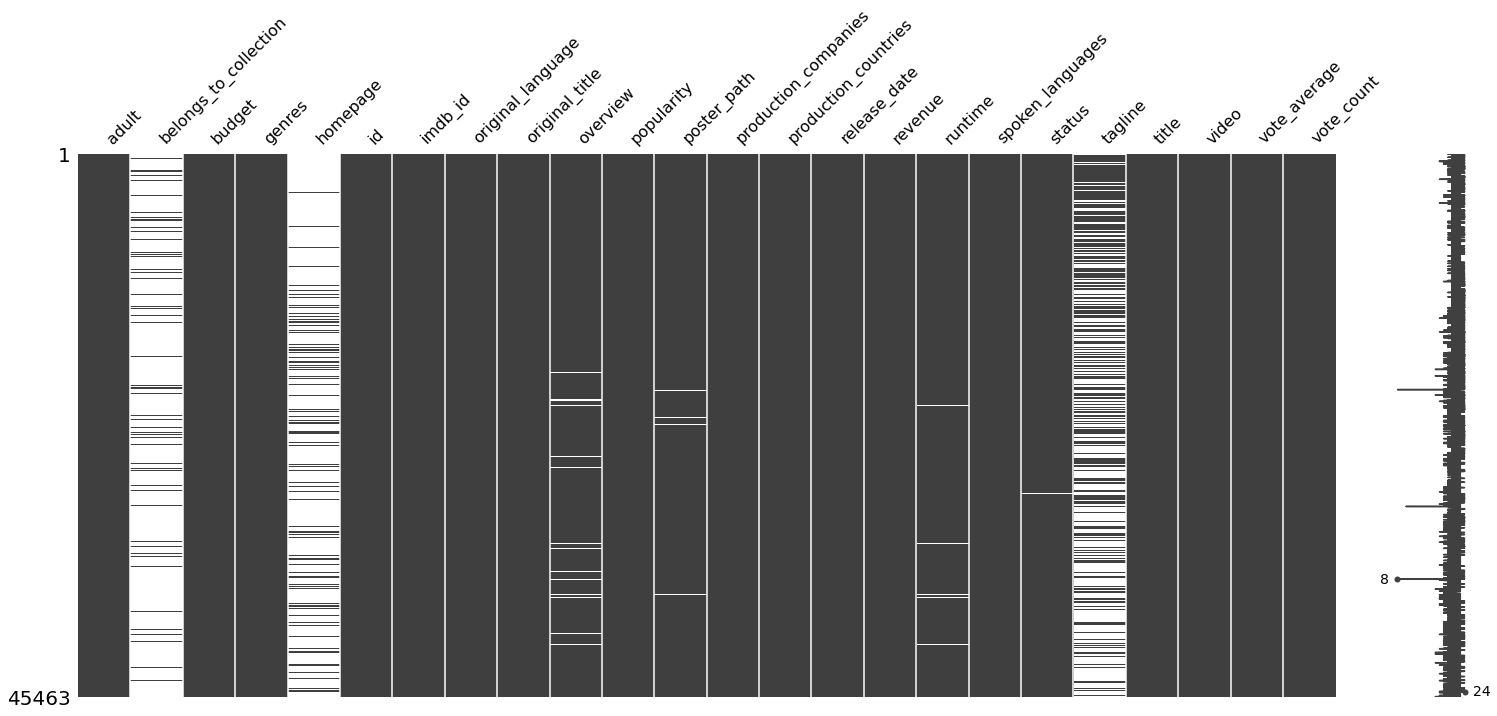

In [50]:
# Visualize missing values as a matrix. The white spaces indicate a missing value.

msno.matrix(dfMovies)

It looks like the "belongs_to_collection", "homepage", and "tagline" columns have several missing values. It is best to not include these in our recommendation models.

## Content Based Filtering

### Browse similar content - Plot based

In [51]:
# Let's drop columns that are almost empty, and rows that don't have neither description AND tagline

dfMovies = dfMovies.drop(['belongs_to_collection', 'homepage'], axis=1)

dfMovies = dfMovies.dropna(subset=['overview', 'tagline'], how='all')

dfMovies.shape

(44517, 22)

In [52]:
# Removing duplicates by title, keeping the first appearance

dfMovies.drop_duplicates(subset='title', keep='first', inplace=True)

dfMovies.shape

(41380, 22)

In [53]:
# Prepare description column

dfMovies['overview'] = dfMovies['overview'].fillna('')

dfMovies['tagline'] = dfMovies['tagline'].fillna('')

dfMovies['description'] = dfMovies['overview'] + ' ' + dfMovies['tagline']

dfMovies['description'][1]

"When siblings Judy and Peter discover an enchanted board game that opens the door to a magical world, they unwittingly invite Alan -- an adult who's been trapped inside the game for 26 years -- into their living room. Alan's only hope for freedom is to finish the game, which proves risky as all three find themselves running from giant rhinoceroses, evil monkeys and other terrifying creatures. Roll the dice and unleash the excitement!"

In [54]:
import re
import nltk
from nltk.stem import WordNetLemmatizer

stemmer = WordNetLemmatizer()

def clean_document(row):
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(row))
    
    # Remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    
    # Converting to Lowercase
    document = document.lower()
    
    # Lemmatization
    document = document.split()

    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    
    return document

In [55]:
# This is the clean description of the movie in index 1.
# Everything is lowercase without any special characters.
# This makes comparing movie descriptions very easy.
dfMovies['clean_description'] = dfMovies['description'].apply(clean_document)
dfMovies['clean_description'][1]

'when sibling judy and peter discover an enchanted board game that open the door to magical world they unwittingly invite alan an adult who been trapped inside the game for 26 year into their living room alan only hope for freedom is to finish the game which prof risky a all three find themselves running from giant rhinoceros evil monkey and other terrifying creature roll the dice and unleash the excitement'

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Remove all english stop words such as 'the', 'a', 'and'
mdlTfvMvs = TfidfVectorizer(stop_words='english')

tfidf_matrix = mdlTfvMvs.fit_transform(dfMovies['clean_description'])

tfidf_matrix.shape

(41380, 68533)

In [57]:
# There are 41308 movies and 68533 different words

For our content-based movie description recommmender, we used the linear_kernel function from scikit-learn. The user will enter a movie and then the recommender will output the top ten most related movies.

This function creates a document-term matrix to find which movie descriptions are most related to the entered movie. A document-term matrix collects all the words in each movie description and finds the frequency of each word. Then, when compared to the words in the descriptions of the movie that the user entered, the matrix will find which other movie decriptions have a similar frequency of words.

From here, we can rank which movies have the higher frequency of similar words.

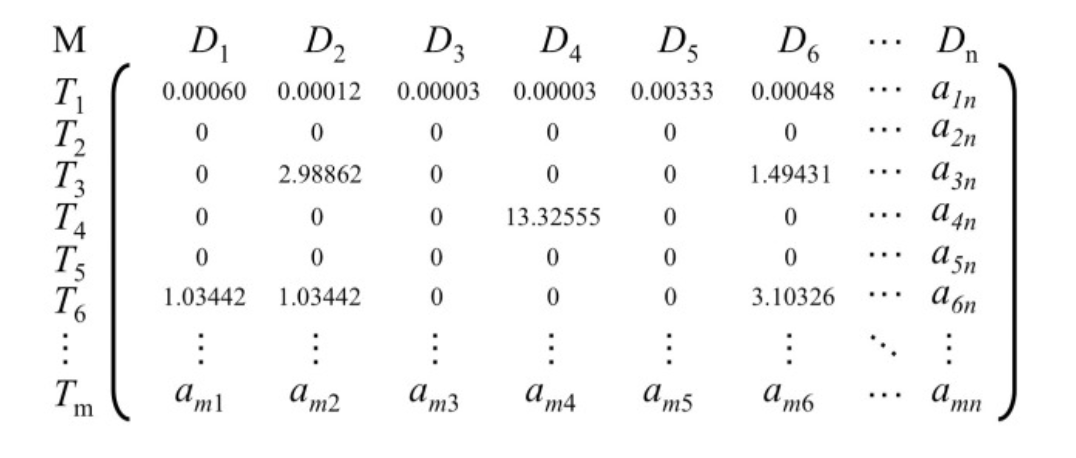

Fig 1. Model of a document-term matrix. For this recommender, the "D" represents the movie descriptions, and the "T" represents each word in the entered movie description.

In [16]:
# We could use the cosine_similarity() method, but we'll rather use linear_kernel for quickness

from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim.shape

(41380, 41380)

In [36]:
# Export to Pickle

import pickle

filename = 'cosine_sim.sav'
pickle.dump(cosine_sim, open(filename, 'wb'))

In [17]:
# Let us create a title-indexed relation

titles = dfMovies['title']

indices = pd.Series(dfMovies.index,index=dfMovies['title'])
indices

title
Toy Story                          0
Jumanji                            1
Grumpier Old Men                   2
Waiting to Exhale                  3
Father of the Bride Part II        4
                               ...  
Caged Heat 3000                45459
Subdue                         45461
Century of Birthing            45462
Satan Triumphant               45464
Queerama                       45465
Length: 41380, dtype: int64

In [18]:
# Function for the API to call easily

def get_recommendations_description(title):
    try:
        # Retrieve the movie index by title
        idx = indices[title] 
        # Retrieve those movies with similarity to whatever passed
        sim_scores = list(enumerate(cosine_sim[idx]))
        # Sort by score, descending order
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        # Keep the top 10 most similar movies
        sim_scores = sim_scores[1:11]
        # Return results in df form
        movie_indices = [i[0] for i in sim_scores]
        return titles.iloc[movie_indices]
    except:
        raise ValueError("The movie entered is not part of the dataset")

In [19]:
# Get the 10 movies with their overview most similar to Toy Story
get_recommendations_description('Toy Story')

15348                                     Toy Story 3
2997                                      Toy Story 2
24523                                       Small Fry
10301                          The 40 Year Old Virgin
23843                     Andy Hardy's Blonde Trouble
3057                                  Man on the Moon
29202                                      Hot Splash
43427                Andy Kaufman Plays Carnegie Hall
38476    Superstar: The Life and Times of Andy Warhol
6435                           What's Up, Tiger Lily?
Name: title, dtype: object

This recommender function just listed the top ten movies with the most similar descriptions as Toy Story.

The most movies at the top of the list are, of course, the Toy Story sequels. The rest of the movies have similar plots to Toy Story based on the movie descriptions.

### Browse similar content - Cast and Keywords based
In this instance, our goal is to have a new dataframe that has title, cast, director, keywords and genres! This will group movies by their producers, since the director tends to use the same cast, but we will also be using keywords and genres to recommend similar movies (plot based).

In [60]:
# Join the movies with the credits dataset
dfMovies = dfMovies.merge(dfCredits, on='id')

# Join the movies with the keywords dataset
dfMovies = dfMovies.merge(dfKeywords, on='id')
dfMovies.head()

,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,poster_path,...,tagline,title,video,vote_average,vote_count,description,clean_description,cast,crew,keywords
0,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,...,,Toy Story,False,7.7,5415.0,"Led by Woody, Andy's toys live happily in his ...",led by woody andy toy live happily in his room...,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,False,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,...,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,When siblings Judy and Peter discover an encha...,when sibling judy and peter discover an enchan...,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,False,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,...,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,A family wedding reignites the ancient feud be...,a family wedding reignites the ancient feud be...,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,False,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,...,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,"Cheated on, mistreated and stepped on, the wom...",cheated on mistreated and stepped on the woman...,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...","[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,False,0,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,...,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,Just when George Banks has recovered from his ...,just when george bank ha recovered from his da...,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...","[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [61]:
# Create new df that holds the 3 to be used columns (cast, keywords and genres)

dfPrdCmp = dfMovies[['id', 'original_title', 'genres', 'cast', 'crew', 'keywords']]
dfPrdCmp.head()

,id,original_title,genres,cast,crew,keywords
0,862,Toy Story,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,Jumanji,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,Grumpier Old Men,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,Waiting to Exhale,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...","[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,Father of the Bride Part II,"[{'id': 35, 'name': 'Comedy'}]","[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...","[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [62]:
# This library helps us parse stringified objects to python objects

from ast import literal_eval

for col in ['genres', 'cast', 'crew', 'keywords']:
    dfPrdCmp[col] = dfPrdCmp[col].apply(literal_eval)

<ipython-input-62-7a8f9ea0eaba>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfPrdCmp[col] = dfPrdCmp[col].apply(literal_eval)


In [63]:
# Function to convert a list to a space separated string
def listToString(s):
    str1 = " "
    return str1.join(s)

# Function to retrieve 'Director' from an object
def get_director(row):
    for x in row:
        if x['job'] == 'Director':
            return x['name']
    # Return empty string if director was not found
    return ""

# Function to get the first three names from an object
def get_list_format(row):
    elements = []
    if isinstance(row, list):
        for element in row:
            elements.append(element['name'])
        # Keep only 3 elements
        if len(elements) > 3:
            elements = elements[:3]
        return elements

    # Return empty list else
    return elements

In [64]:
# Retrieve directors and remove crew column

dfPrdCmp['director'] = dfPrdCmp.apply(lambda x: get_director(x['crew']),  axis=1)

dfPrdCmp = dfPrdCmp.drop(['crew'], axis=1)

dfPrdCmp.head()

<ipython-input-64-848071ef6cd4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfPrdCmp['director'] = dfPrdCmp.apply(lambda x: get_director(x['crew']),  axis=1)


,id,original_title,genres,cast,keywords,director
0,862,Toy Story,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...",John Lasseter
1,8844,Jumanji,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'id': 10090, 'name': 'board game'}, {'id': 1...",Joe Johnston
2,15602,Grumpier Old Men,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'id': 1495, 'name': 'fishing'}, {'id': 12392...",Howard Deutch
3,31357,Waiting to Exhale,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'cast_id': 1, 'character': 'Savannah 'Vannah...","[{'id': 818, 'name': 'based on novel'}, {'id':...",Forest Whitaker
4,11862,Father of the Bride Part II,"[{'id': 35, 'name': 'Comedy'}]","[{'cast_id': 1, 'character': 'George Banks', '...","[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...",Charles Shyer


In [65]:
# Retrieve and format keywords, cast and genres

for col in ['genres', 'cast', 'keywords']:
    dfPrdCmp[col] = dfPrdCmp[col].apply(get_list_format)
    dfPrdCmp[col] = dfPrdCmp[col].apply(listToString)
    
dfPrdCmp.head()

,id,original_title,genres,cast,keywords,director
0,862,Toy Story,Animation Comedy Family,Tom Hanks Tim Allen Don Rickles,jealousy toy boy,John Lasseter
1,8844,Jumanji,Adventure Fantasy Family,Robin Williams Jonathan Hyde Kirsten Dunst,board game disappearance based on children's book,Joe Johnston
2,15602,Grumpier Old Men,Romance Comedy,Walter Matthau Jack Lemmon Ann-Margret,fishing best friend duringcreditsstinger,Howard Deutch
3,31357,Waiting to Exhale,Comedy Drama Romance,Whitney Houston Angela Bassett Loretta Devine,based on novel interracial relationship single...,Forest Whitaker
4,11862,Father of the Bride Part II,Comedy,Steve Martin Diane Keaton Martin Short,baby midlife crisis confidence,Charles Shyer


In [66]:
# Define the 'Document' column

dfPrdCmp['cast_plot'] = dfPrdCmp['genres'] + " " + dfPrdCmp['cast'] + " " + dfPrdCmp['director'] + " " + dfPrdCmp['keywords']
dfPrdCmp['cast_plot'][1]

"Adventure Fantasy Family Robin Williams Jonathan Hyde Kirsten Dunst Joe Johnston board game disappearance based on children's book"

In [67]:
# Clean the 'Document' column

dfPrdCmp['cast_plot_clean'] = dfPrdCmp['cast_plot'].apply(clean_document)
dfPrdCmp['cast_plot_clean'][1]

'adventure fantasy family robin williams jonathan hyde kirsten dunst joe johnston board game disappearance based on child book'

In [68]:
# Remove all english stop words such as 'the', 'a', 'and'

mdlTfvMvs = TfidfVectorizer(stop_words='english')

tfidf_matrix = mdlTfvMvs.fit_transform(dfPrdCmp['cast_plot_clean'])

tfidf_matrix.shape

# There are 42308 movies and 78477 different words

(42308, 49027)

In [69]:
# Here we will use the cosine similary method just for educational purposes

# from sklearn.metrics.pairwise import cosine_similarity

# Compute the cosine similarity matrix
cosine_simOT = linear_kernel(tfidf_matrix, tfidf_matrix) #, dense_output=True)
cosine_simOT.shape

(42308, 42308)

In [71]:
# Export to Pickle

filename = 'cosine_simOT.sav'
pickle.dump(cosine_simOT, open(filename, 'wb'))

In [72]:
# Let us create an original_title-indexed relation

titlesOT = dfPrdCmp['original_title']

indicesOT = pd.Series(dfPrdCmp.index,index=dfPrdCmp['original_title'])
indicesOT

original_title
Toy Story                          0
Jumanji                            1
Grumpier Old Men                   2
Waiting to Exhale                  3
Father of the Bride Part II        4
                               ...  
Caged Heat 3000                42303
رگ خواب                        42304
Siglo ng Pagluluwal            42305
Satana likuyushchiy            42306
Queerama                       42307
Length: 42308, dtype: int64

In [81]:
# Function for the API to call easily

def get_recommendations_plot_cast(title):
    try:
        # Retrieve the movie index by title
        idx = indicesOT[title] 
        # Retrieve those movies with similarity to whatever passed
        sim_scores = list(enumerate(cosine_simOT[idx]))
        # Sort by score, descending order
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        # Keep the top 10 most similar movies
        sim_scores = sim_scores[1:11]
        # Return results in df form
        movie_indices = [i[0] for i in sim_scores]
        return titlesOT.iloc[movie_indices]
    except:
        raise ValueError("The movie entered is not part of the dataset")

In [32]:
# Get the 10 movies with their genre and cast most similar to The Dark Knight
get_recommendations_plot_cast('Toy Story')

24249             Toy Story That Time Forgot
2957                             Toy Story 2
14776                            Toy Story 3
20806                   Toy Story of Terror!
14527                 Waking Sleeping Beauty
18227                                Tin Toy
18277                            Red's Dream
14135    Mr. Warmth: The Don Rickles Project
24247                        Partysaurus Rex
23110                      Hawaiian Vacation
Name: original_title, dtype: object

Here, we have the top ten movies with the most similar cast and keywords. This list can pertain more to genres or select demographics, as we can see that these movie reommendations are more kid-friendly.

Let's compare these movie recommendations to the movie description-based recommender:

In [33]:
get_recommendations_description("Toy Story")

15348                                     Toy Story 3
2997                                      Toy Story 2
24523                                       Small Fry
10301                          The 40 Year Old Virgin
23843                     Andy Hardy's Blonde Trouble
3057                                  Man on the Moon
29202                                      Hot Splash
43427                Andy Kaufman Plays Carnegie Hall
38476    Superstar: The Life and Times of Andy Warhol
6435                           What's Up, Tiger Lily?
Name: title, dtype: object

The first few movies from both recommendation lists are similar, but they differ as we go down the list.

This demonstrates how the recommender you choose will affect the recommendations.

## Collaborative Filtering Recommendation

Collaborative filtering finds recommendations for users based on other users' selections.

In our "ratings" dataset, several users rated their favorite movies along with some of their least favorite movies. Collaborative filtering will compare all the ratings from all the users, and then make recommendations for users who have similar movie ratings.

For our code, we will create a function that can predict each user's ratings for each movie, which will be implemented to our collaborative filtering recommender that will recommend the top ten movies with the highest predicted movie ratings for that user.

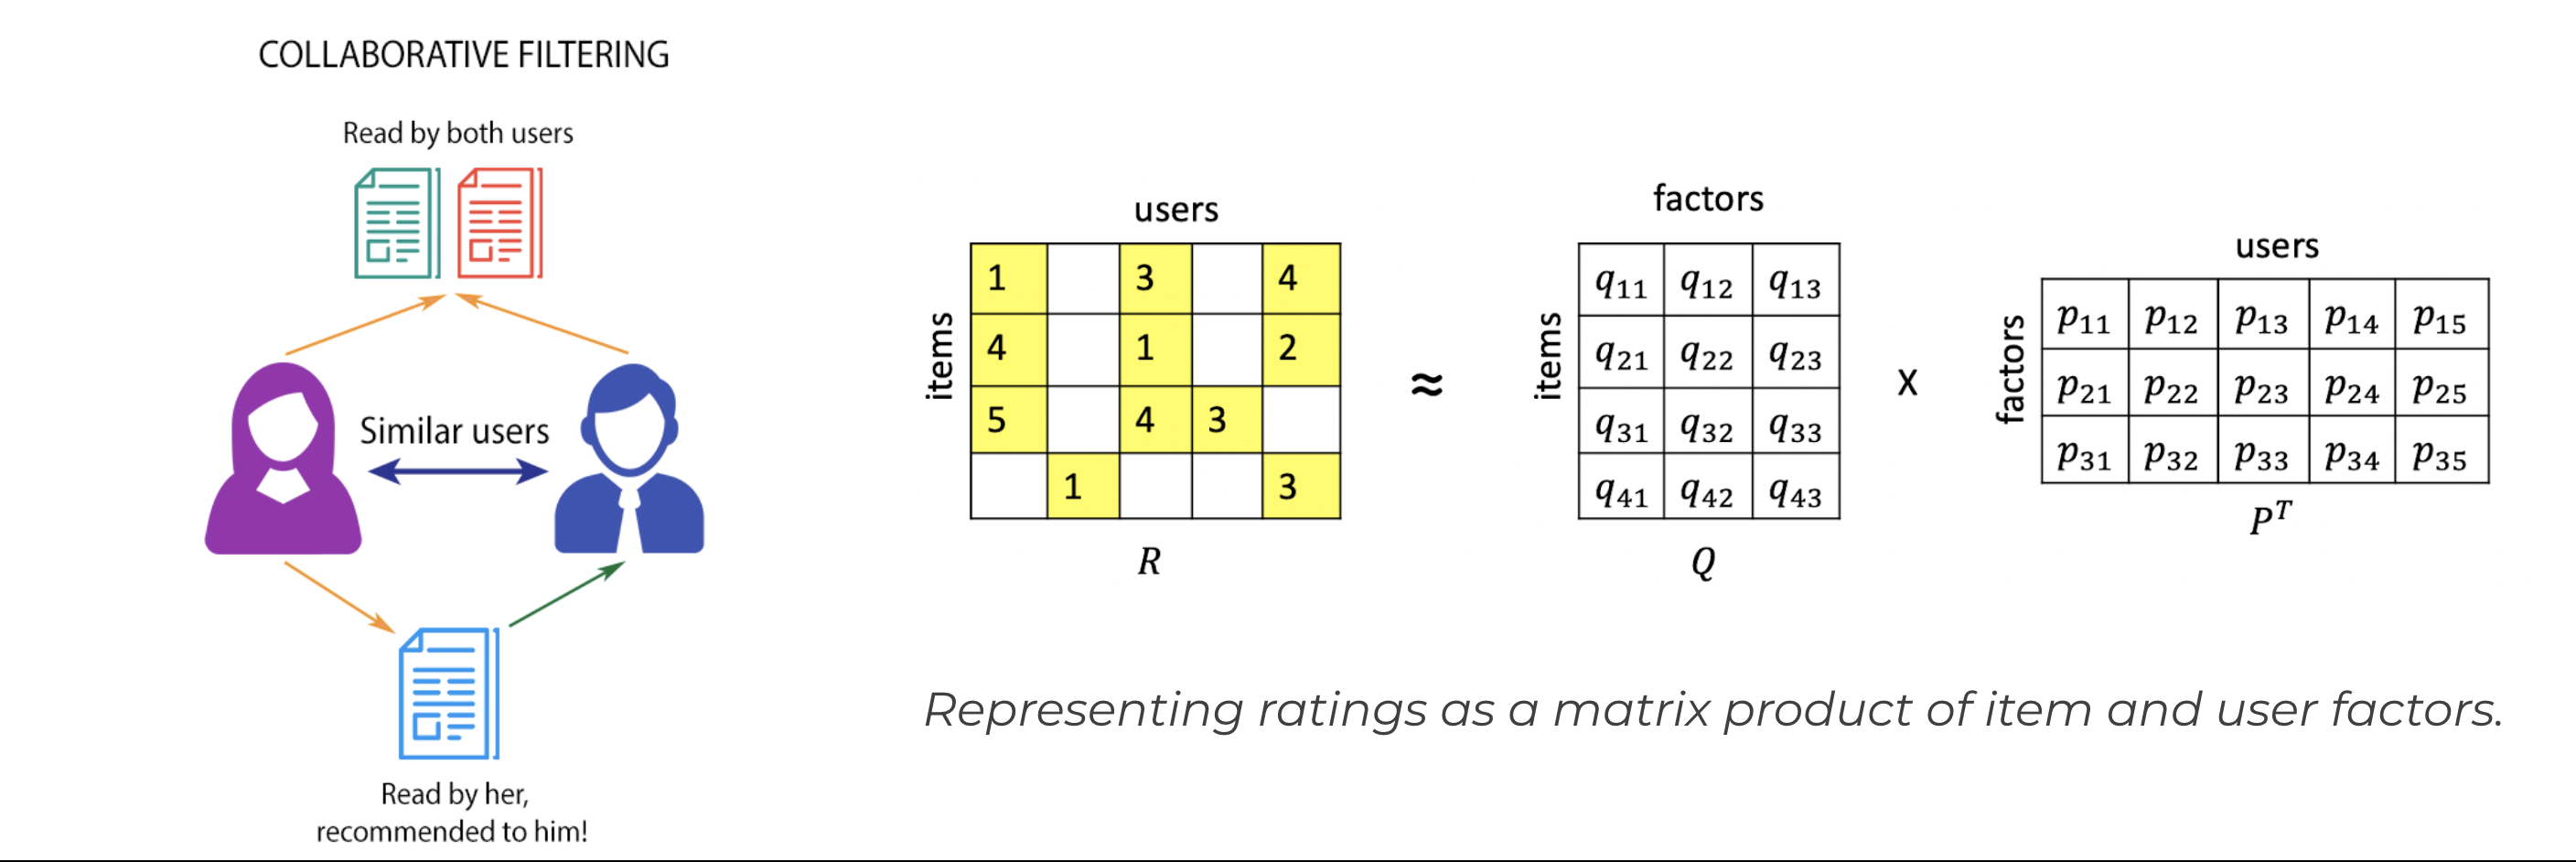

Fig 2. Model of a collaborative filtering network. This implements the ratings of others will similar movie tastes and makes recommendations for users.

In [73]:
# Rating scale goes from 0 to 5

dfRatings.describe()

,userId,id,rating
count,44994.000000,44994.000000,44994.000000
mean,345.963395,6010.754901,3.560986
std,194.871031,15918.243916,1.053169
min,1.000000,2.000000,0.500000
25%,177.000000,500.000000,3.000000
50%,359.000000,1394.000000,4.000000
75%,518.000000,2805.000000,4.000000
max,671.000000,160718.000000,5.000000


In [74]:
# Retrieve the users for login information

print("The list of existing users is:", set(dfRatings['userId'])) 

The list of existing users is: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 2

In [76]:
# !pip install scikit-surprise

In [36]:
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import train_test_split

# Specify what the rating scale was
reader = Reader(rating_scale=(0, 5))

# The columns must correspond to user id, item id and ratings
X = Dataset.load_from_df(dfRatings[['userId', 'id', 'rating']], reader)

# Sample random trainset and testset
X_train, X_test = train_test_split(X, test_size=.25)

In [50]:
from surprise import SVD
from surprise import accuracy

# Define SVD model
mdlSvdMvsRtg = SVD()

# Fit SVD model
mdlSvdMvsRtg.fit(X_train)

# Predict ratings for testset
test_pred = mdlSvdMvsRtg.test(X_test)

# Evaluate SVD model
accuracy.rmse(test_pred) # this means that our data will be at most .90 units from the model

RMSE: 0.9006


0.9006253982099575

In [ ]:
# Export SVD model to pikle

filename = 'svd_model.sav'
pickle.dump(mdlSvdMvsRtg, open(filename, 'wb'))

This error shows that the mean square error for estimating each user's movie rating for a select movie. Our predicted movie rating, which is on a scale of 1-5, has a mean square error of 0.90.

In [38]:
# Cross validate our potential models

from surprise.model_selection import cross_validate

cross_validate(mdlSvdMvsRtg, X, cv=5)

{'test_rmse': array([0.90690532, 0.89939582, 0.89001168, 0.89779562, 0.90010329]),
 'test_mae': array([0.69555521, 0.69359472, 0.68912256, 0.69141328, 0.69613609]),
 'fit_time': (2.0337939262390137,
  1.976639986038208,
  2.0265750885009766,
  1.972649097442627,
  2.053093194961548),
 'test_time': (0.058708906173706055,
  0.05321502685546875,
  0.0632939338684082,
  0.06124377250671387,
  0.05178523063659668)}

In [39]:
# Score new data points

movieIdx = 350
pred = mdlSvdMvsRtg.predict(1, movieIdx) 
print("Have user", pred.uid, "watched movie with index", movieIdx, "the predicted score would be", 
      (str(round(pred.est, 2)) + "."), "Was the estimation impossible to do?", pred.details['was_impossible'])

Have user 1 watched movie with index 350 the predicted score would be 2.97. Was the estimation impossible to do? False


In [77]:
# Create dataframe to hold movies in the ratings dataframe

dfRatUnique = dfRatings.drop_duplicates(subset='id', keep="first")

dfRatUnique["predicted_rating"] = ""

dfRatUnique.head()

<ipython-input-77-c9042e40c3a0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfRatUnique["predicted_rating"] = ""


,userId,id,rating,original_title,predicted_rating
0,1,1371,2.5,Rocky III,
47,1,1405,1.0,Greed,
93,1,2105,4.0,American Pie,
140,1,2193,2.0,My Tutor,
182,1,2294,2.0,Jay and Silent Bob Strike Back,


In [78]:
dfRatUnique.to_csv('dfRatUnique.csv')

In [38]:
# Function to predict the score of a specific movie from a user

def get_ind_score(uid, movieIdx):
    try:
        pred = mdlSvdMvsRtg.predict(uid, movieIdx)
        if pred.details['was_impossible'] == False:
            return round(pred.est,2)
        else:
            return -1
    except:
        raise ValueError("The user ID or movie ID entered is not included in the database")

In [40]:
# Function for the API to call easily

def get_recommendations_per_user(uid, n=10):
    try:
        # Apply prediction algorithm for that specific user rating
        dfRatUnique['predicted_rating'] = dfRatUnique.apply(lambda x: get_ind_score(uid, x['id']), axis=1)
        # Sort by descending value
        dfRatUnique.sort_values('predicted_rating', ascending=False, inplace=True)
        # Return first N elements
        return (dfRatUnique['original_title'].tolist())[:n]
    except:
        raise ValueError("The user ID entered is not included in the database")

In [41]:
# Give me the top 10 movies the user will probably like
get_recommendations_per_user(1)

ValueError: The user ID entered is not included in the database

Here, we have the top ten movie recommendations for user 1. The "get_ind_score" function predicted the movie ratings that user 1 would give for each movie, and then compiled the top ten movie ratings into a list.

### Notebook developed by Alejandro Gleason Méndez,  Emily Crowell, Ricardo Antonio Vázquez Rodríguez, Seniru Kottegoda

# APPENDIX

## How to Run Movie Finder:

### 1. Add dataset .csv files:

a. Create a free Kaggle account: https://www.kaggle.com

b. Download the dataset from Kaggle: https://www.kaggle.com/rounakbanik/the-movies-dataset/download

c. Move all the .csv files inside the Datasets folder

### 2. Install the needed modules

a. Run “pip3 install surprise” or "conda install -c conda-forge scikit-surprise", depending on your system

### 3. Run the model creation file inside the repository at Jupyter/movieRecomendationModel.py

a. Previous requirements: 13 GB+ free space available in order to save the model file.

b. In order to do this execute the following command inside the Jupyter folder: python movieRecomendationModel.py

c. This should take some minutes to finish running. (about 15 minutes)

d. Once it finishes running, you should see files have been exported to the folder Serialized_objects

### 4. Run the application

a. Go to the Flask folder.

b. Run the app.py (python app.py)

## Testing and Troubleshooting

### Testing the content-based movie description filter recommenders with correct and incorrect inputs

Let's enter a movie in the database. We should get a list of the top ten most related movies to the movie input

In [14]:
get_recommendations_description("The Dark Knight")

NameError: name 'get_recommendations_description' is not defined

As we can see, our function worked properly.

Now, let's misspell the movie, which will not be in the movie database.

In [15]:
# Let's take out the word "The", which is not the correct title:

get_recommendations_description("Dark Knight")

NameError: name 'get_recommendations_description' is not defined

Here, we can see that the function raised the ValueError with the message "The movie entered is not part of the dataset." This is the intended response. The user will have to enter the correct movie spelling.

Now, let's test the other filter functions.

### Testing the content-based cast and keyword filter recommenders with correct and incorrect inputs

The correct response:

In [79]:
get_recommendations_plot_cast("The Dark Knight")

17441                                The Dark Knight Rises
9846                                         Batman Begins
11019                                         The Prestige
40552                                    I Am Heath Ledger
14470                                             Kick-Ass
20332                                           Kick-Ass 2
26696    LEGO DC Comics Super Heroes: Justice League vs...
13432                  The Imaginarium of Doctor Parnassus
37919                                  People of a Feather
29927                                 Atom Man vs Superman
Name: original_title, dtype: object

The incorrect response:

In [80]:
get_recommendations_plot_cast("Dark Knight")

ValueError: The 

Here, we can see the raised ValueError.

### Testing the collaborative filter movie rating prediction function with correct and incorrect inputs

The correct response:

In [87]:
get_ind_score(1, 110)

ValueError: The user ID or movie ID entered is not included in the database

This is the correct output, with the rating of the movie with ID number 110.

The incorrect response:

In [83]:
get_ind_score(1, -1)

ValueError: The user ID or movie ID entered is not included in the database

Here, we can see the incorrect input resulted in the raised ValueError

### Testing the collaborative filter movie ranking function with correct and incorrect inputs

The correct response:

In [88]:
get_recommendations_per_user(1)

ValueError: The user ID entered is not included in the database

Here, we can see that we got the top ten movie recommendations for user 1.

The incorrect response

In [89]:
get_recommendations_per_user(-1)

ValueError: The user ID entered is not included in the database

Here, we can see the incorrect user input resulted in the raised ValueError

## References

Banik, R. (2017, November 10). The Movies Dataset. Retrieved from https://www.kaggle.com/rounakbanik/the-movies-dataset

Maklin, C. (2019, July 21). TF IDF: TFIDF Python Example. Retrieved from https://towardsdatascience.com/natural-language-processing-feature-engineering-using-tf-idf-e8b9d00e7e76


Text Mining: Word Frequency Models: NLP Blog Post. (2019, July 03). Retrieved from https://www.mosaicdatascience.com/2015/10/12/text-mining-word-frequency-models/
